In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Training Data

In [68]:
df = pd.read_csv('train.csv')
df.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4.0,7.0,5.0,7.0,3.0,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5.0,3.0,3.0,4.0,3.0,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6.0,8.0,2.0,3.0,3.0,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4.0,6.0,5.0,7.0,5.0,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4.0,1.0,2.0,3.0,5.0,0.415


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596949 entries, 0 to 596948
Data columns (total 22 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   id                               596949 non-null  int64  
 1   MonsoonIntensity                 596949 non-null  int64  
 2   TopographyDrainage               596949 non-null  int64  
 3   RiverManagement                  596949 non-null  int64  
 4   Deforestation                    596949 non-null  int64  
 5   Urbanization                     596949 non-null  int64  
 6   ClimateChange                    596949 non-null  int64  
 7   DamsQuality                      596949 non-null  int64  
 8   Siltation                        596949 non-null  int64  
 9   AgriculturalPractices            596949 non-null  int64  
 10  Encroachments                    596949 non-null  int64  
 11  IneffectiveDisasterPreparedness  596949 non-null  int64  
 12  Dr

In [70]:
df.describe()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,596949.000000,596949.000000,596949.000000,596949.000000,596949.000000,596949.000000,596949.000000,596949.000000,596949.000000,596949.000000,...,596949.000000,596949.000000,596949.000000,596949.000000,596948.000000,596948.000000,596948.000000,596948.000000,596948.000000,596948.000000
mean,298474.000000,4.921680,4.928046,4.955760,4.941427,4.941432,4.933150,4.957435,4.927630,4.941253,...,4.946404,4.957774,4.930324,4.929909,4.926508,4.926017,4.948550,4.943457,4.940042,0.504521
std,172324.477258,2.055615,2.095698,2.070418,2.051401,2.080778,2.058152,2.084395,2.066105,2.066968,...,2.071417,2.087404,2.077901,2.083460,2.063781,2.074702,2.067846,2.080330,2.093857,0.050927
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.285000
25%,149237.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,3.000000,...,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,0.470000
50%,298474.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,0.505000
75%,447711.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,0.540000
max,596948.000000,16.000000,18.000000,16.000000,17.000000,17.000000,16.000000,16.000000,16.000000,16.000000,...,17.000000,17.000000,16.000000,16.000000,17.000000,18.000000,18.000000,16.000000,16.000000,0.725000


### DATA VISUALIZATION

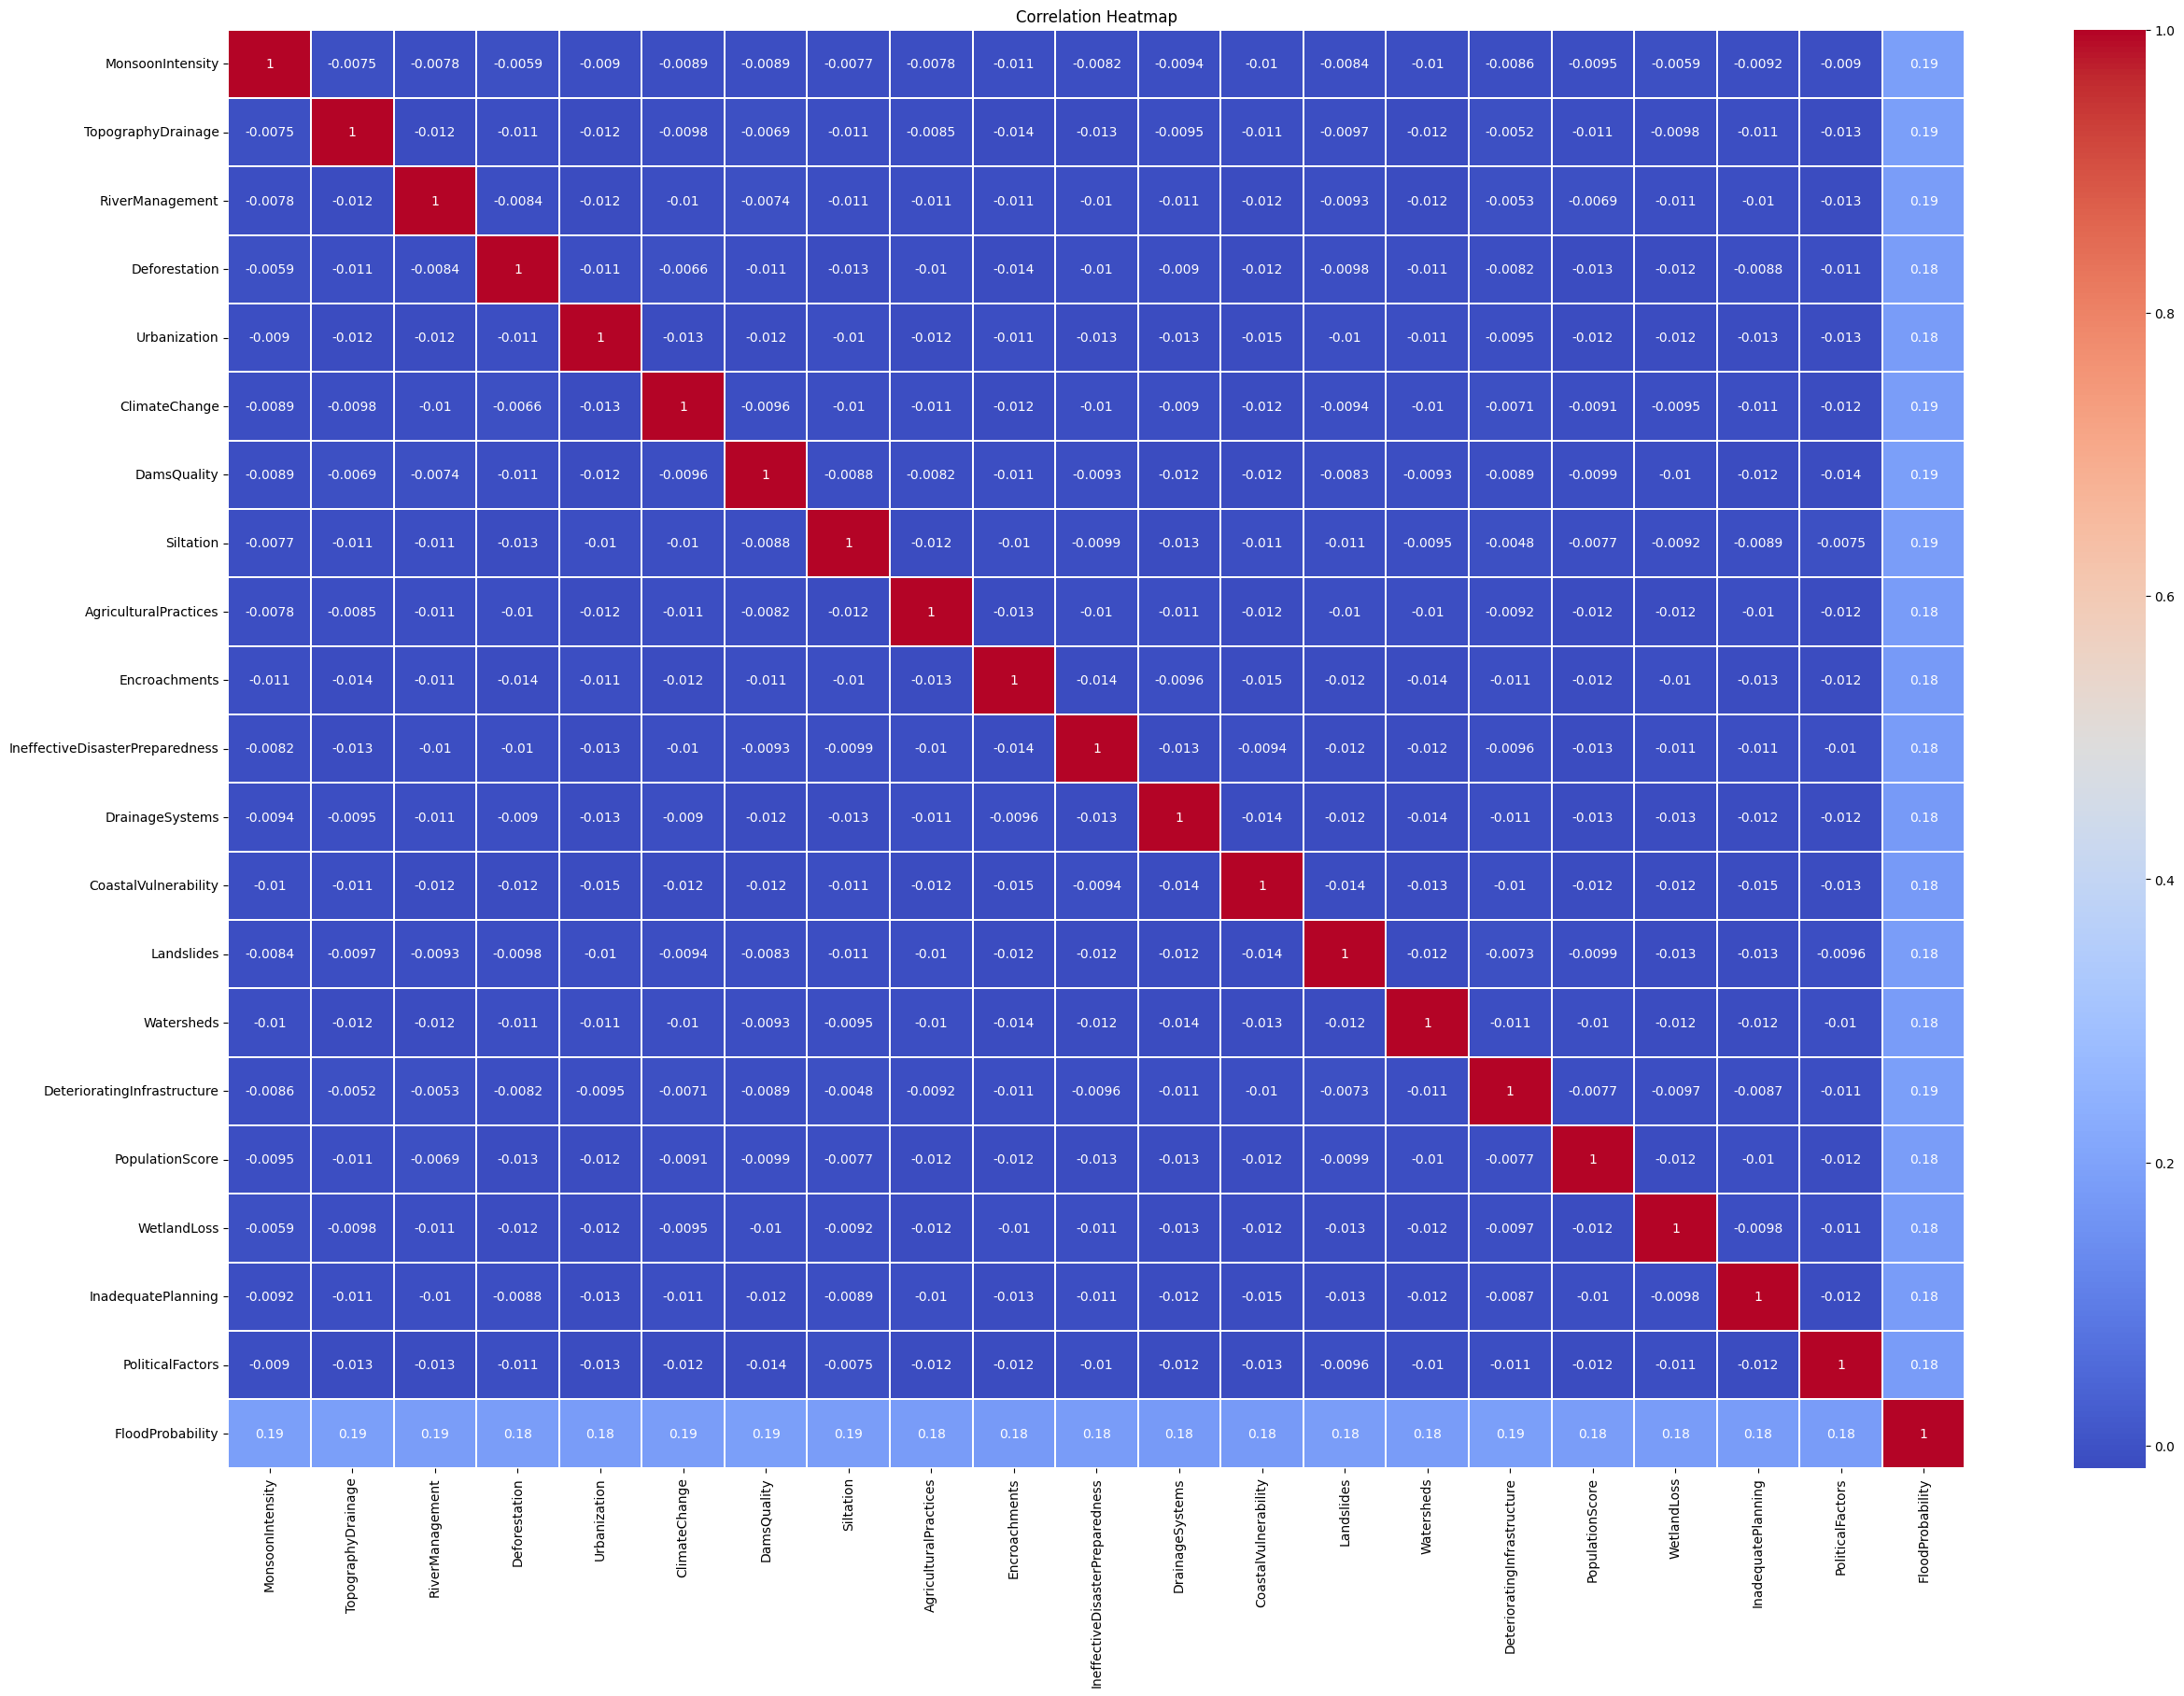

In [71]:
plt.figure(figsize=(30,20))
corr = df.drop('id',axis=1).corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.3)
plt.title('Correlation Heatmap')
plt.show()

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


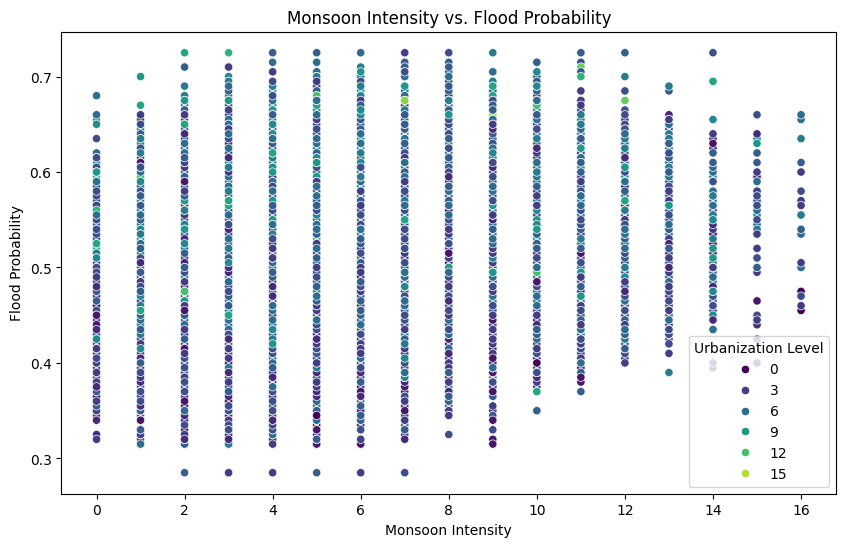

In [72]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='MonsoonIntensity', y='FloodProbability', hue='Urbanization', palette='viridis')
plt.title('Monsoon Intensity vs. Flood Probability')
plt.xlabel('Monsoon Intensity')
plt.ylabel('Flood Probability')
plt.legend(title='Urbanization Level')
plt.show()

/tmp/ipython-input-3468618417.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='TopographyDrainage', y='FloodProbability', palette='Set3')


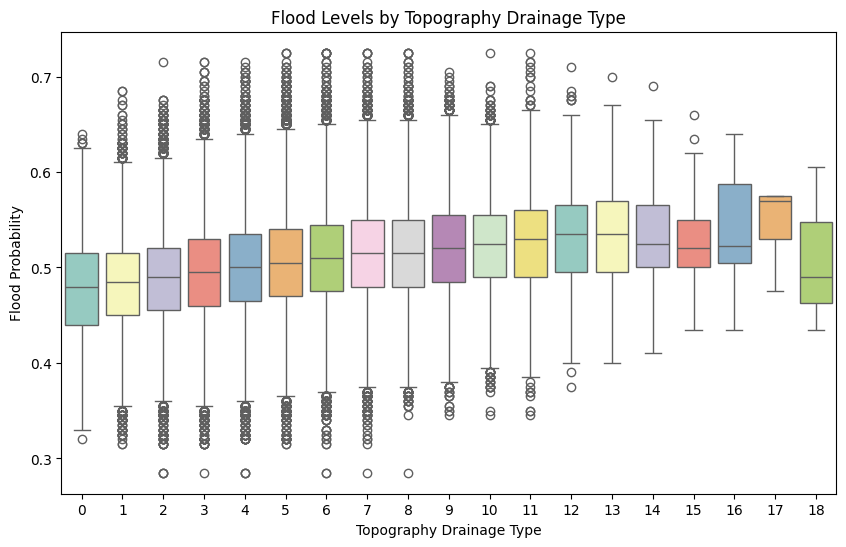

In [73]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='TopographyDrainage', y='FloodProbability', palette='Set3')
plt.title('Flood Levels by Topography Drainage Type')
plt.xlabel('Topography Drainage Type')
plt.ylabel('Flood Probability')
plt.show()

/tmp/ipython-input-4154950069.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='AgriculturalPractices', y='FloodProbability', palette='muted')


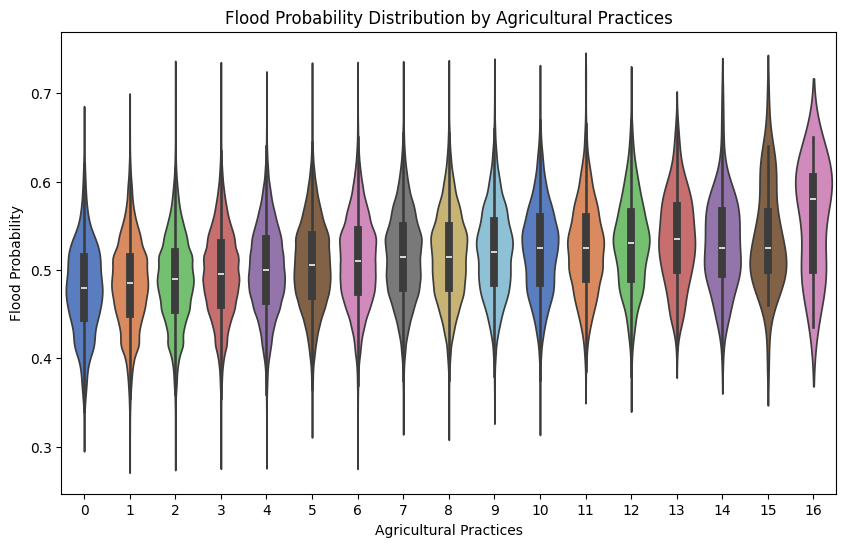

In [74]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='AgriculturalPractices', y='FloodProbability', palette='muted')
plt.title('Flood Probability Distribution by Agricultural Practices')
plt.xlabel('Agricultural Practices')
plt.ylabel('Flood Probability')
plt.show()


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


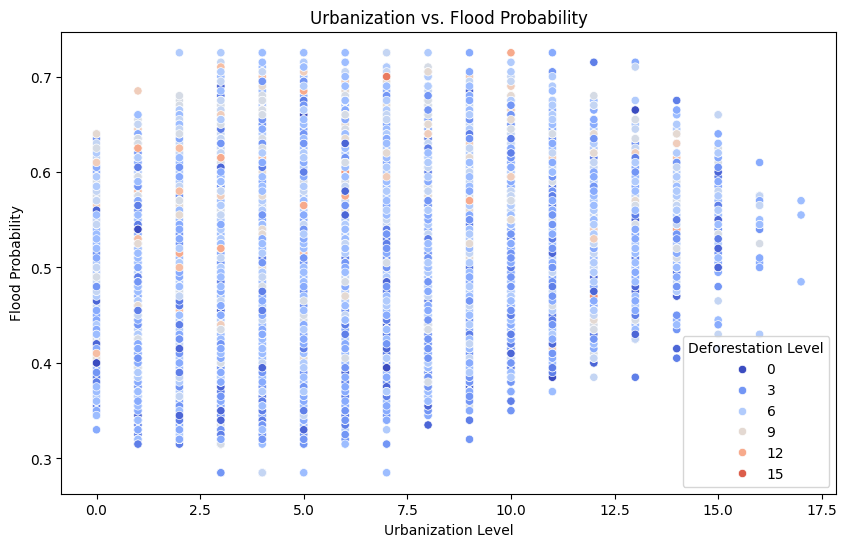

In [75]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Urbanization', y='FloodProbability', hue='Deforestation', palette='coolwarm')
plt.title('Urbanization vs. Flood Probability')
plt.xlabel('Urbanization Level')
plt.ylabel('Flood Probability')
plt.legend(title='Deforestation Level')
plt.show()

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


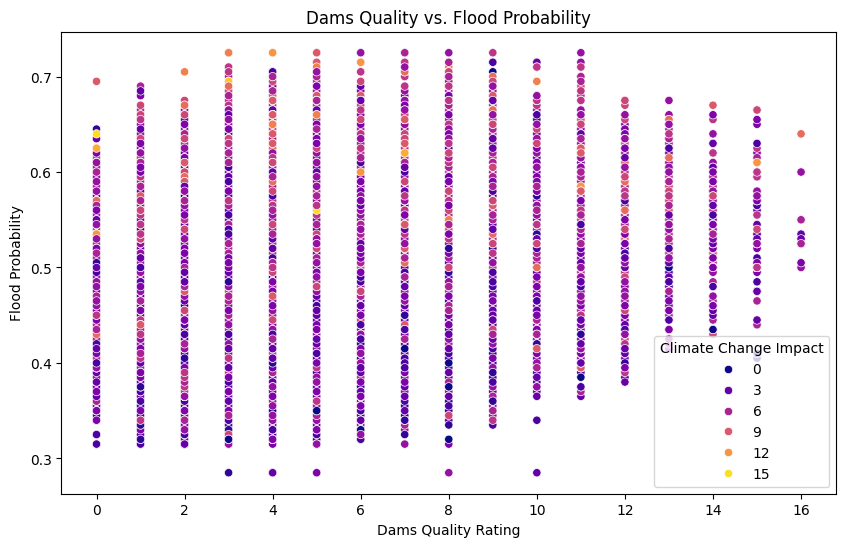

In [76]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='DamsQuality', y='FloodProbability', hue='ClimateChange', palette='plasma')
plt.title('Dams Quality vs. Flood Probability')
plt.xlabel('Dams Quality Rating')
plt.ylabel('Flood Probability')
plt.legend(title='Climate Change Impact')
plt.show()


### Test data

In [77]:
x=df.drop(['id','FloodProbability'],axis=1)
y=df[['FloodProbability']]

In [78]:
x.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,5,8,5,8,6,4,4,3,3,4,2,5,3,3,5,4.0,7.0,5.0,7.0,3.0
1,6,7,4,4,8,8,3,5,4,6,9,7,2,0,3,5.0,3.0,3.0,4.0,3.0
2,6,5,6,7,3,7,1,5,4,5,6,7,3,7,5,6.0,8.0,2.0,3.0,3.0
3,3,4,6,5,4,8,4,7,6,8,5,2,4,7,4,4.0,6.0,5.0,7.0,5.0
4,5,3,2,6,4,4,3,3,3,3,5,2,2,6,6,4.0,1.0,2.0,3.0,5.0


##Test File


In [79]:
test_url = "https://github.com/robitussin/CCMACLRL_EXAM/blob/ebd51da1dafde093c18d9e8f35c834d91b2887f7/datasets/test.csv?raw=true"
testdata = pd.read_csv(test_url)

testdata.head()


,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,1117957,4,6,3,5,6,7,8,7,8,...,8,5,7,5,6,3,6,4,4,5
1,1117958,4,4,2,9,5,5,4,7,5,...,2,4,7,4,5,1,7,4,4,3
2,1117959,1,3,6,5,7,2,4,6,4,...,7,9,2,5,5,2,3,6,8,3
3,1117960,2,4,4,6,4,5,4,3,4,...,7,8,4,6,7,6,4,2,4,4
4,1117961,6,3,2,4,6,4,5,5,3,...,4,3,2,6,4,6,8,4,5,5


## Sample Submission File

In [80]:
import pandas as pd

# Load sample submission file to get IDs
sample_submission_url = 'https://github.com/robitussin/CCMACLRL_EXAM/blob/ebd51da1dafde093c18d9e8f35c834d91b2887f7/datasets/sample_submission.csv?raw=true'
samplefile = pd.read_csv(sample_submission_url)

# Prepare features for prediction
X_final = testdata.drop(columns=["id"], errors='ignore')

# Predict using the trained model
y_pred = model.predict(X_final)

# Flatten y_pred if it's 2D
y_pred = y_pred.ravel()  # Converts (n_samples, 1) -> (n_samples,)

# Create submission DataFrame
submission_df = pd.DataFrame({
    'id': samplefile['id'],  # Make sure IDs align with testdata
    'FloodProbability': y_pred
})

# Save submission file
submission_df.to_csv("submission_file.csv", index=False)
print("Submission file created: submission_file.csv")

# Show first few rows
print(submission_df.head())


Submission file created: submission_file.csv
        id  FloodProbability
0  1117957          0.573632
1  1117958          0.455309
2  1117959          0.454540
3  1117960          0.466146
4  1117961          0.466164
